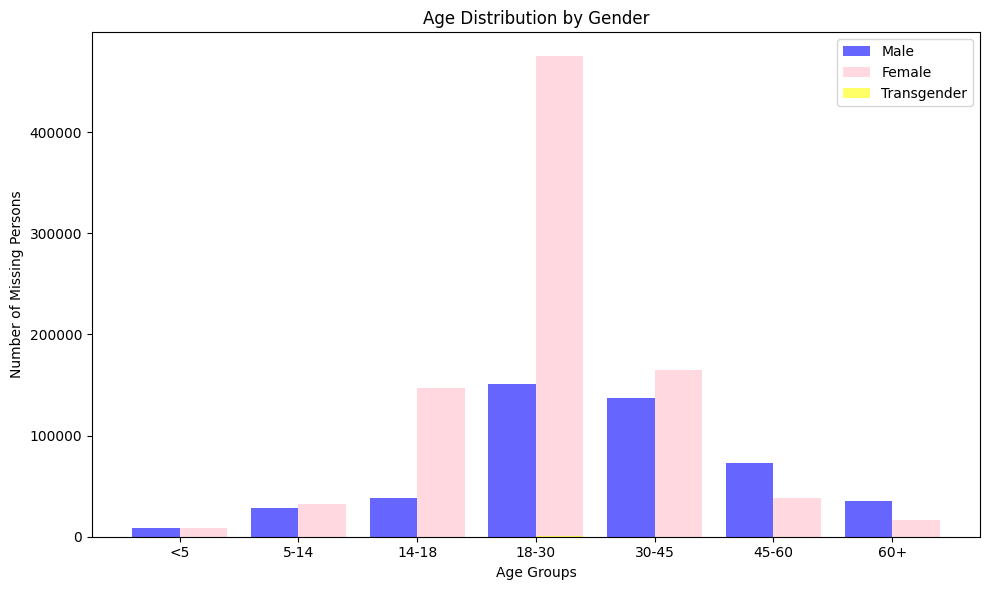

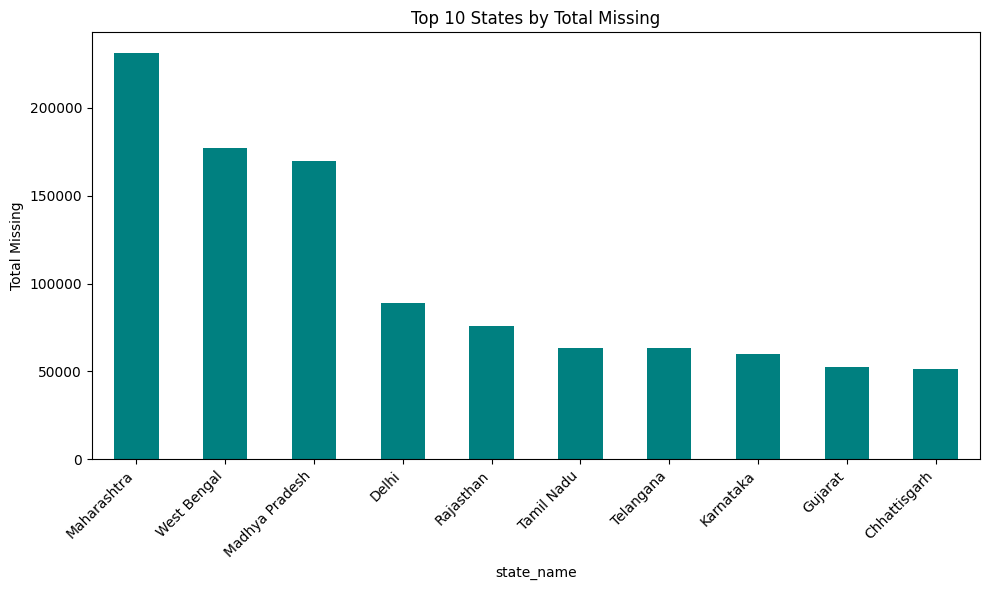

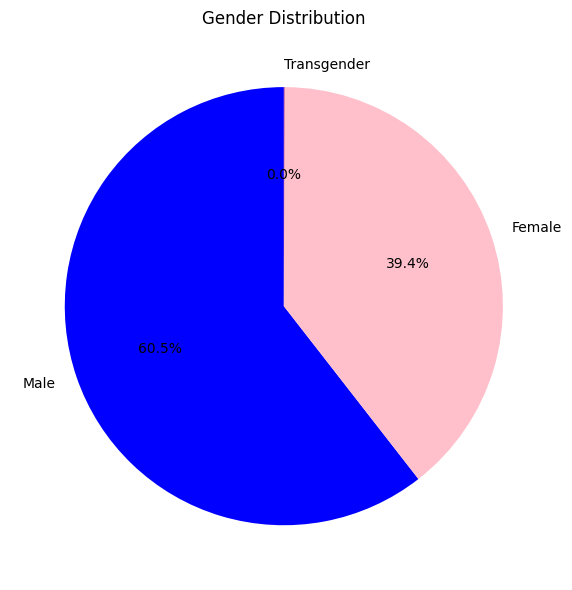

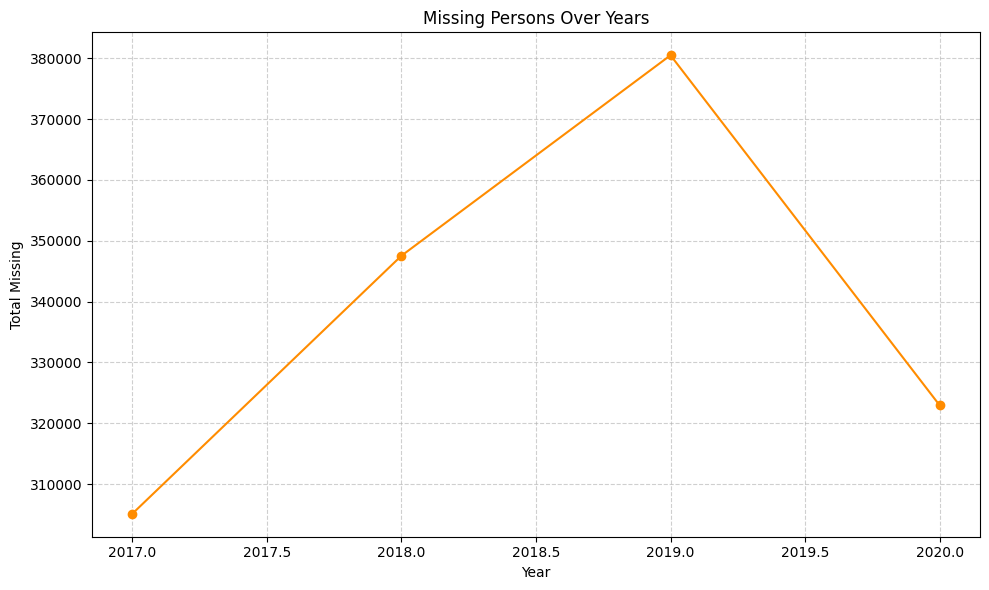

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/cleaned/cleaned_missing_data.csv')

# --- AGE DISTRIBUTION BY GENDER ---
age_cols_male = [
    'male_below_5_years', 'male_5_to_14_years', 'male_14_to_18_years',
    'male_18_to_30_years', 'male_30_to_45_years', 'male_45_to_60_years', 'male_60_years_and_above'
]
age_cols_female = [col.replace('male', 'female') for col in age_cols_male]
age_labels = ['<5', '5-14', '14-18', '18-30', '30-45', '45-60', '60+']

age_cols_transgender = [
    'trangender_below_5_years', 'trangender_5_to_14_years', 'trangender_14_to_18_years',
    'trangender_18_to_30_years', 'trangender_30_to_45_years', 'trangender_45_to_60_years', 'transgender_60_years_and_above']


male_ages = df[age_cols_male].sum().values
female_ages = df[age_cols_female].sum().values
transgender_age=df[age_cols_transgender].sum().values

plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(age_labels))

plt.bar([p - bar_width/2 for p in x], male_ages, width=bar_width, color='blue', alpha=0.6, label='Male')
plt.bar([p + bar_width/2 for p in x], female_ages, width=bar_width, color='pink', alpha=0.6, label='Female')
plt.bar([p + bar_width/2 for p in x], transgender_age, width=bar_width, color='yellow', alpha=0.6, label='Transgender')

plt.xticks(x, age_labels)
plt.title('Age Distribution by Gender')
plt.xlabel('Age Groups')
plt.ylabel('Number of Missing Persons')
plt.legend()
plt.tight_layout()
plt.savefig('../visual/age_gender_bar.png')
plt.show()

# --- TOP 10 STATES ---
plt.figure(figsize=(10, 6))
state_trends = df.groupby('state_name')['total_missing'].sum().sort_values(ascending=False).head(10)
state_trends.plot(kind='bar', color='teal')
plt.title('Top 10 States by Total Missing')
plt.ylabel('Total Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visual/top_states.png')
plt.show()

# --- GENDER DISTRIBUTION ---
gender_totals = {
    'Male': df.filter(like='male_').sum().sum(),
    'Female': df.filter(like='female_').sum().sum(),
    'Transgender': df.filter(like='trangender_').sum().sum()
}

plt.figure(figsize=(6, 6))
plt.pie(
    gender_totals.values(), 
    labels=gender_totals.keys(), 
    autopct='%1.1f%%',
    colors=['blue', 'pink', 'purple'],
    startangle=90
)
plt.title('Gender Distribution')
plt.tight_layout()
plt.savefig('../visual/gender_pie.png')
plt.show()

# --- YEAR-WISE TRENDS ---
plt.figure(figsize=(10, 6))
year_trends = df.groupby('year')['total_missing'].sum()
year_trends.plot(kind='line', marker='o', color='darkorange')
plt.title('Missing Persons Over Years')
plt.xlabel('Year')
plt.ylabel('Total Missing')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('../visual/year_trends.png')
plt.show()
